In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

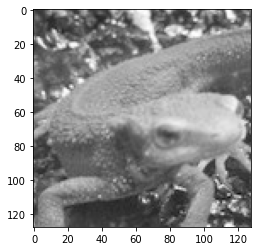

In [2]:
img = cv2.cvtColor(cv2.imread("../imori.jpg"), cv2.COLOR_BGR2GRAY)
H, W = img.shape
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
pad = 1
K = 3
K_v = [ [1, 2, 1], [0, 0, 0], [-1, -2, -1] ]
K_h = [ [1, 0, -1], [2, 0, -2], [1, 0, -1] ]

tmp_img = np.zeros((H+2*pad, W+2*pad))
tmp_img[pad:pad+H, pad:pad+W] = img.copy()
output_img_h = tmp_img.copy()
output_img_v = tmp_img.copy()

for i in range(H):
    for j in range(W):
        output_img_h[i+pad, j+pad] = np.sum(K_h * tmp_img[i:i+K, j:j+K])
        output_img_v[i+pad, j+pad] = np.sum(K_v * tmp_img[i:i+K, j:j+K])
        
output_img_h = np.clip(output_img_h, 0, 255).astype("uint8")
output_img_v = np.clip(output_img_v, 0, 255).astype("uint8")

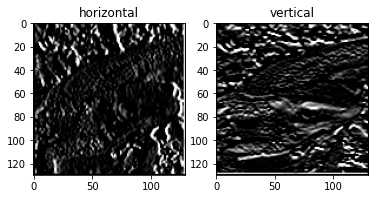

In [9]:
plt.subplot(1, 2, 1)
plt.imshow(output_img_h, cmap="gray")
plt.title("horizontal")
plt.subplot(1, 2, 2)
plt.imshow(output_img_v, cmap="gray")
plt.title("vertical")
plt.show()